# Introduction 

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

## Content 

1. age - age in years 
2. sex - (1=male; 0= female)
3. cp - chest pain type 
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - fasting blood sugar > 120 mg/dl (1=true; 0=false)
7. restecg - resting electrocardiographic results (values 0,1,2)
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1=yes; 0=no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 1 = normal; 2 = fixed defect; 3 = reversable defect
14. target - has heart disease or not (1=yes; 0=no)


In [383]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Modeling, Testing, and Training 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#GOAL: Predict whether each person has heart disease

/kaggle/input/heart-disease-uci/heart.csv


### Data Analysis

In [358]:
# Loading in the data 
data = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

data.sample(10)
#data.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3,0
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1


In [359]:
# NULLS?
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:title={'center':'Correlation of Features'}>

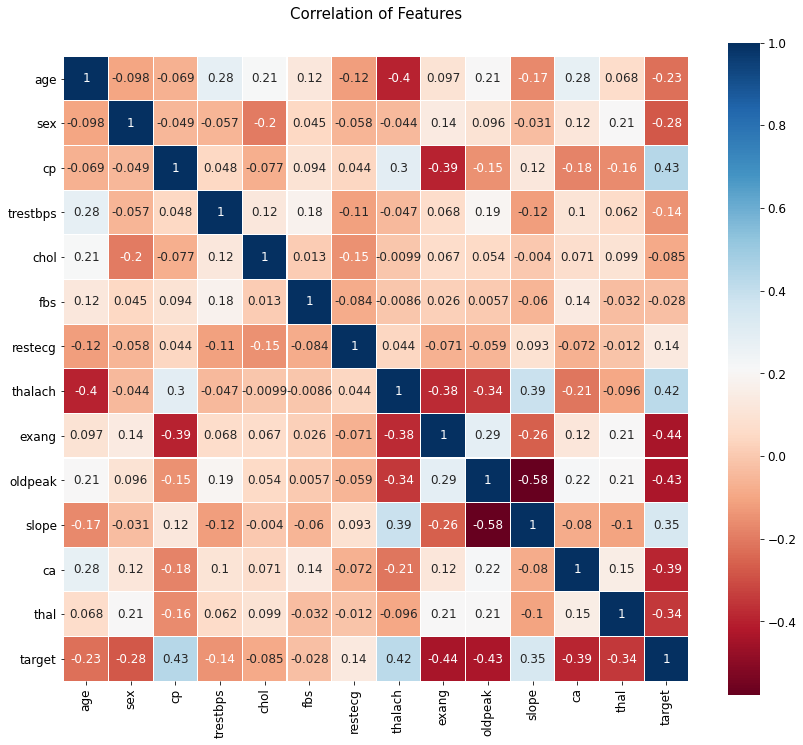

In [360]:
# COLOR MAP

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

**Interpretation** 

From the Pearson Correlation Heatmap we can see the following: 

- target and cp variable are mildly positively correlated (correlation coefficient = 0.43).

- target and thalach variable are also mildly positively correlated (correlation coefficient = 0.42).

- target and slope variable are weakly positively correlated (correlation coefficient = 0.35).

- target and exang variable are mildly negatively correlated (correlation coefficient = -0.44).

- target and oldpeak variable are also mildly negatively correlated (correlation coefficient = -0.43).

- target and ca variable are weakly negatively correlated (correlation coefficient = -0.39).

- target and thal variable are also waekly negatively correlated (correlation coefficient = -0.34).

### Age Analysis

In [361]:
data['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64

In [362]:
minAge = min(data['age'])
maxAge = max(data['age'])
meanAge = data['age'].mean()

print('Min Age: ', minAge)
print('Max Age: ', maxAge)
print('Mean Age: ', meanAge)

Min Age:  29
Max Age:  77
Mean Age:  54.366336633663366


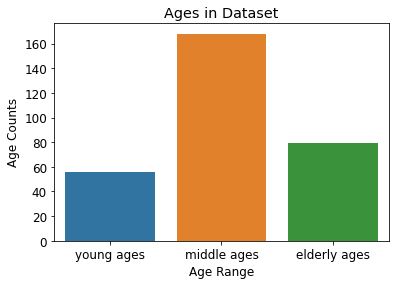

In [363]:
young_ages = data[(data['age'] >= 29) & (data['age'] < 45)]
middle_ages = data[(data['age'] >= 45) & (data['age'] <= 60)]
elderly_ages = data[(data['age'] > 60)]

sns.barplot(x=['young ages', 'middle ages', 'elderly ages'], y=[len(young_ages), len(middle_ages), 
                                                                len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages in Dataset')
plt.show()

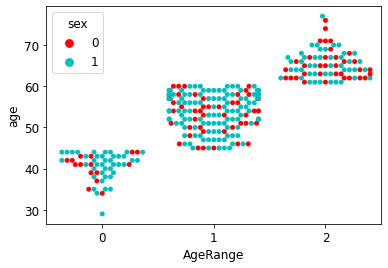

In [364]:
# Categorical Scatter Plot 

data['AgeRange'] = 0
young_age_index = data[(data['age'] >= 29) & (data['age'] < 45)].index
middle_age_index = data[(data['age'] >= 45) & (data['age'] <= 60)].index
elderly_age_index = data[(data['age'] > 60)].index

for index in elderly_age_index:
    data.loc[index,'AgeRange']=2
    
for index in middle_age_index:
    data.loc[index,'AgeRange']=1

for index in young_age_index:
    data.loc[index,'AgeRange']=0
    
sns.swarmplot(x='AgeRange', y='age', hue='sex', palette=["r", "c", "y"], data=data)
plt.show()

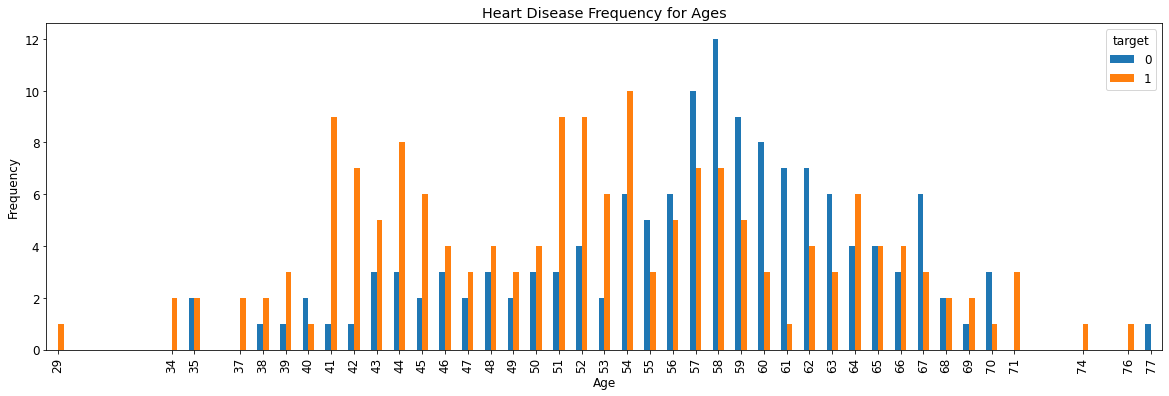

In [365]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Interpretation**

- After taking a look at the amount of patients per age, I decided to break up the sample into the three following groups: 
- - Young Ages: 29(min) - 44
- - Middle Ages: 45 - 60
- - Elderly Ages: 60 - 77(max)
- We can see the majority of the dataset is in the 'Middle Ages' range 

### Chest Pain Type Analysis

In [366]:
data.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [367]:
data.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

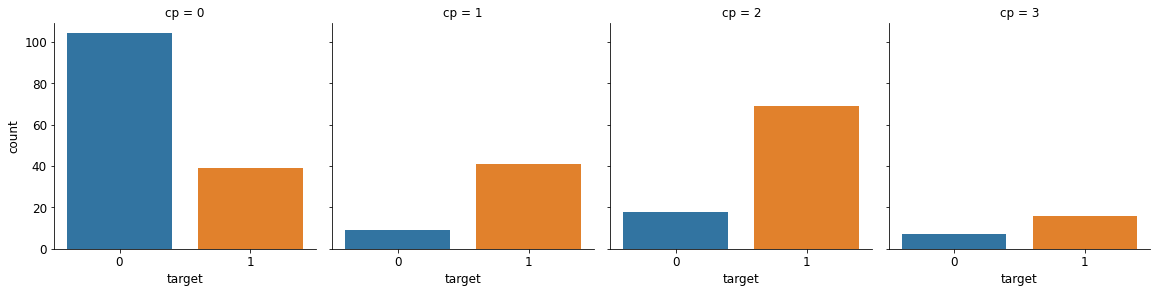

In [368]:
ax = sns.catplot(x="target", col="cp", data=data, kind="count", height=4, aspect=1)
plt.show()

**Interpretation**

- The cp variable contains four integer values 0,1,2, and 3.
- The target variable is categorized into the presence and absence of heart disease by the groupby function 
- This was visualized using a catplot

### Thalach Analysis 

In [369]:
data['thalach'].nunique()

91

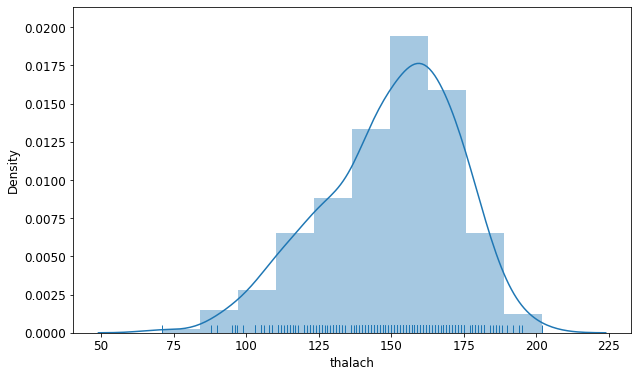

In [370]:
f, ax = plt.subplots(figsize=(10,6))
x = data['thalach']
ax = sns.distplot(x, rug=True, bins=10)
plt.show()

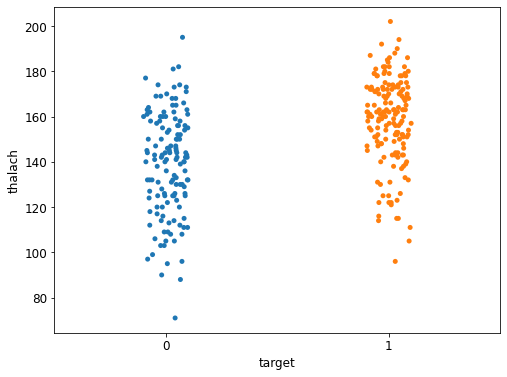

In [371]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=data)
plt.show()

**Interpretation**

- Initially, we could see the number of unique variables was high for this dataset (91). 
- Next, the histogram shows us that thalach is slightly negatively skewed. 
- The final strip plot tells us that the people suffering from heart disease (target=1) have a relatively higher heart rate (thalach) compared to those not suffering from heart disease (target=0). 

**Definitions**

Histogram
: Represents the distribution of data by forming bins along the range of the data then drawing bars to show the number of observations that fall in each bin.

### Additional Analysis 

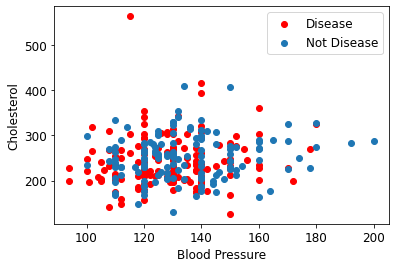

In [372]:
plt.scatter(x=data.trestbps[data.target==1], y=data.chol[(data.target==1)], c="red")
plt.scatter(x=data.trestbps[data.target==0], y=data.chol[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Blood Pressure")
plt.ylabel("Cholesterol")
plt.show()

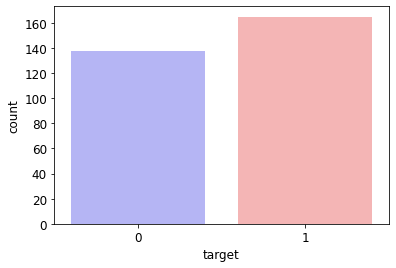

In [373]:
data.target.value_counts()
sns.countplot(x='target', data=data, palette='bwr')
plt.show()

### Models, Training, and Testing

**Logistic Regression**

In [374]:
targets = data['target'].sample(61)
targets.value_counts().sum()

61

In [375]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('target', 1), data['target'], 
                                                   test_size=.2, random_state=10)

In [376]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:,1]
y_pred_bin = model.predict(x_test)

In [377]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[26,  9],
       [ 5, 21]])

In [378]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8387096774193549
Specificity :  0.7


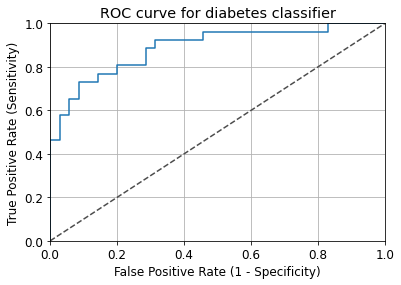

In [379]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [380]:
auc(fpr, tpr)

0.8890109890109891

**Interpretation**

- Diagnostic tests are often sold, marketed, cited and used with sensitivity and specificity as the headlined metrics. 
- good rating from the AUC metric

**Definitions** 

Sensitivity = (True Positives) / (True Positives + False Negatives) 

Specificity = (True Negatives) / (True Negatives + False Positives)

Reciever Operating Charateristics (ROC) curve: a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. 

Area Under the Curve (AUC): A convenient way to capture the performance of a model in a single number, although it does have certain issues. 

AUC Classification: 
- 0.90 - 1.00 = excellent 
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair 
- 0.60 - 0.70 = poor 
- 0.50 - 0.60 = fail 

### Final Score and Outputs 

In [381]:
Score = round(model.score(x_train, y_train)*100, 2)
Score

86.36

In [382]:
Output = pd.DataFrame({'Target': targets, 'Prediction': y_pred_bin})
Output.sample(10)

,Target,Prediction
33,1,0
285,0,1
118,1,0
97,1,0
122,1,1
224,0,0
54,1,1
228,0,1
103,1,1
226,0,0
